Синтезирование данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

# Генерация синтетических данных о точках обслуживания
def generate_synthetic_service_data(n_points=1000):
    np.random.seed(42)
    service_point_ids = np.arange(1, n_points + 1)
    locations = np.random.choice(['North', 'South', 'East', 'West'], n_points)
    availability = np.random.uniform(0, 1, n_points)  # 0 = низкая доступность, 1 = высокая
    quality_of_service = np.random.uniform(0, 1, n_points)  # 0 = низкое качество, 1 = высокое качество

    data = pd.DataFrame({
        'SERVICE_POINT_ID': service_point_ids,
        'LOCATION': locations,
        'AVAILABILITY': availability,
        'QUALITY_OF_SERVICE': quality_of_service
    })
    return data

data = generate_synthetic_service_data()
print(data.head())


   SERVICE_POINT_ID LOCATION  AVAILABILITY  QUALITY_OF_SERVICE
0                 1     East      0.698162            0.519082
1                 2     West      0.536096            0.479182
2                 3    North      0.309528            0.025642
3                 4     East      0.813795            0.341248
4                 5     East      0.684731            0.380196


Предобработка данных

In [5]:
# Преобразование категориальных данных в числовые
data['LOCATION'] = data['LOCATION'].map({'North': 0, 'South': 1, 'East': 2, 'West': 3})

# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['AVAILABILITY', 'QUALITY_OF_SERVICE', 'LOCATION']])

# Создание DataFrame для кластеризации
data_scaled_df = pd.DataFrame(data_scaled, columns=['AVAILABILITY', 'QUALITY_OF_SERVICE', 'LOCATION'])


Кластеризация данных

F:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
F:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting

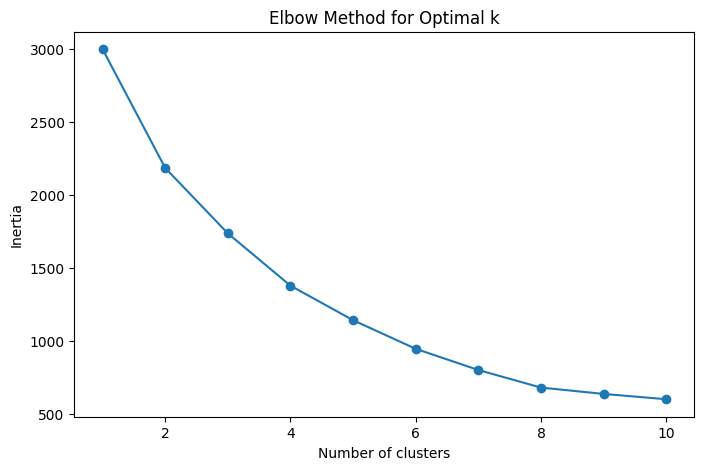

F:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


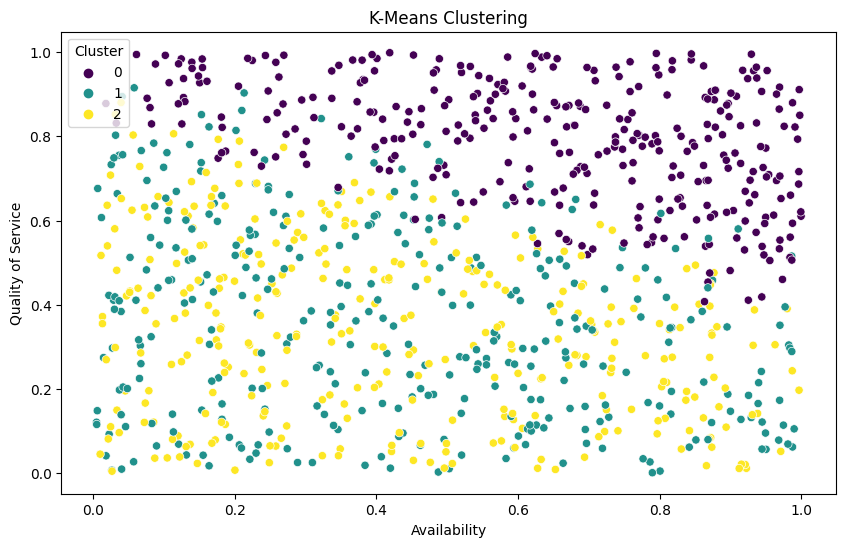

In [8]:
# Определение числа кластеров с помощью метода локтя
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Выбор оптимального числа кластеров и применение K-Means
optimal_k = 3  # Предположим, что выбрали 3 кластера после анализа метода локтя
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(data_scaled_df)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVAILABILITY', y='QUALITY_OF_SERVICE', hue='CLUSTER', data=data, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Availability')
plt.ylabel('Quality of Service')
plt.legend(title='Cluster')
plt.show()


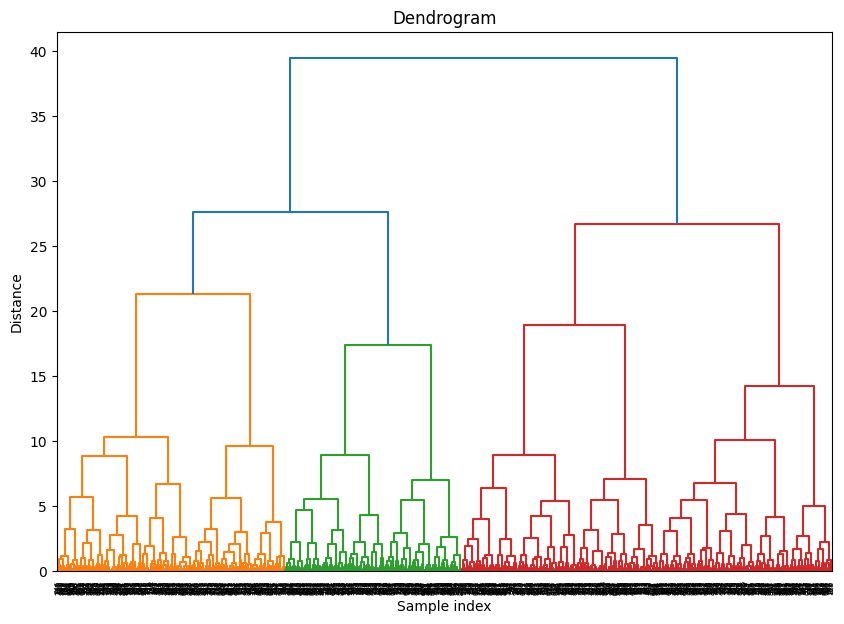

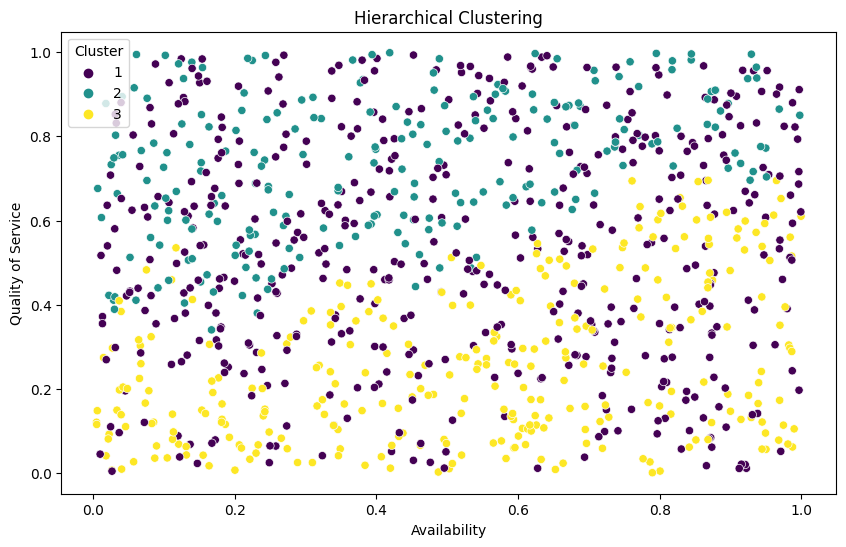

In [10]:
# Дендограмма для определения числа кластеров
plt.figure(figsize=(10, 7))
linked = linkage(data_scaled_df, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Применение иерархической кластеризации
num_clusters = 3  # Предположим, что выбрали 3 кластера после анализа дендограммы
hierarchical_clusters = fcluster(linked, num_clusters, criterion='maxclust')
data['HIERARCHICAL_CLUSTER'] = hierarchical_clusters

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVAILABILITY', y='QUALITY_OF_SERVICE', hue='HIERARCHICAL_CLUSTER', data=data, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Availability')
plt.ylabel('Quality of Service')
plt.legend(title='Cluster')
plt.show()
